



\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#
#     PART A Section I       # 
\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#
  

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!unzip "/content/gdrive/My Drive/Colab Notebooks/DL Assignment 2/data1-2.h5.zip"

Archive:  /content/gdrive/My Drive/Colab Notebooks/DL Assignment 2/data1-2.h5.zip
  inflating: data1.h5                


In [3]:
import numpy as np
import h5py

# Function to load Images from data1.h5 
def loadDataH5():
  with h5py.File('data1.h5','r') as hf:
    trainX = np.array(hf.get('trainX'))
    trainY = np.array(hf.get('trainY'))
    valX = np.array(hf.get('valX'))
    valY = np.array(hf.get('valY'))
    print (trainX.shape,trainY.shape)
    print (valX.shape,valY.shape)
  return trainX, trainY, valX, valY

trainX, trainY, testX, testY = loadDataH5()

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


##1) CNN 1 conv + 1 MaxPool

The below CNN implementation will study a basic CNN baseline with 1 convolutional layer and 1 Max Pooling layer

In [0]:
import tensorflow as tf

# Create class ShallowNet to build CNN model containing layers of convolutional and pooling
class ShallowNet:
  # function for creating the CNN model
  def build(width, height, depth, classes):
    # Sequential model with 1 conv, 1 Maxpooling and after flattening, the last soft max activation layer
    model = tf.keras.Sequential()
    inputShape = (height, width, depth)
    # convolutional Layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same",input_shape=inputShape, activation='relu'))
    # Max pooling Layer
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
    # the output is flattenned ...
    model.add(tf.keras.layers.Flatten())
    # ... before feeding the softmax activation layer 
    model.add(tf.keras.layers.Dense(classes, activation='softmax'))
    
    return model


In [5]:
# Nb of epochs
NUM_EPOCHS = 15

# Batch size
batchSize = 51


print("Compiling model...")
# Choice of an optimizer: SGD Optimizer with a learning rate of 0.01 
opt = tf.keras.optimizers.SGD(lr=0.01)

# CNN model is built for iputs image of 128x128x3
model = ShallowNet.build(width=128, height=128, depth=3, classes=17)

print (model.summary())
# CNN Model is compiled with the above optimizer
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# CNN model is trained with data1.h5 data with the above specified batch size and nb of epochs
print("Training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),batch_size=batchSize, epochs=NUM_EPOCHS)

Compiling model...
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0         
_________________________________________________________________
dense (Dense)                (None, 17)                4456465   
Total params: 4,458,257
Trainable params: 4,458,257
Non-trainable params: 0
_________________________________________________________________
None
Training network...
Train on 1020 samples, validate on 340 samples
Epoch 1/15
1020/1020 [==============================] - 5s 5ms/sample - loss: 2.6840 - acc: 0.1461 - 

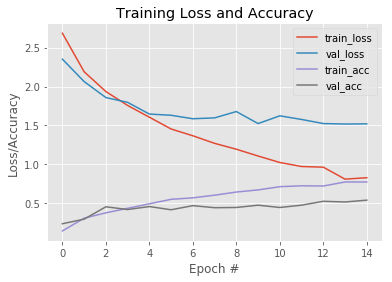

In [6]:
import matplotlib.pyplot as plt

# The above trained sample results is plot.
plt.style.use("ggplot")
plt.figure()
# Train loss is plot
plt.plot(np.arange(0, NUM_EPOCHS), H.history["loss"], label="train_loss")
# Validation loss is plot
plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_loss"], label="val_loss")
# Train accuracy is plot
plt.plot(np.arange(0, NUM_EPOCHS), H.history["acc"], label="train_acc")
# Validation accuracy is plot
plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

##2) CNN 2 conv + 2  MaxPool
The below CNN implementation will study a basic CNN baseline with 2 convolutional layers and 2 Max Pooling layers

In [0]:
import tensorflow as tf

# Create class ShallowNet to build CNN model containing 2 layers of convolutional and 2 max pooling
class ShallowNet2:
  # function for creating the CNN model
  def build(width, height, depth, classes):
    # Sequential model with 2 conv, 2 Maxpooling and after flattening, the last soft max activation layer
    model = tf.keras.Sequential()
    inputShape = (height, width, depth)
    # 1st convolutional layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same",input_shape=inputShape, activation='relu'))
    # 1st Max Pooling layer
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
    # 2nd convolutional layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same",input_shape=inputShape, activation='relu'))
    # 2nd Max Pooling layer
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
    # the output is flattenned ...
    model.add(tf.keras.layers.Flatten())
    # ... before feeding the softmax activation layer
    model.add(tf.keras.layers.Dense(classes, activation='softmax'))
    
    return model

In [8]:
# Nb of epochs
NUM_EPOCHS = 15

# Batch size
batchSize = 51


print("Compiling model...")
# Choice of an optimizer: SGD Optimizer with a learning rate of 0.01 
opt = tf.keras.optimizers.SGD(lr=0.01)

# CNN model is built for iputs image of 128x128x3
model2 = ShallowNet2.build(width=128, height=128, depth=3, classes=17)

print (model2.summary())
# CNN Model is compiled with the above optimizer
model2.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# CNN model is trained with data1.h5 data with the above specified batch size and nb of epochs
print("Training network...")
H2 = model2.fit(trainX, trainY, validation_data=(testX, testY),batch_size=batchSize, epochs=NUM_EPOCHS)

Compiling model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 17)                1114129   
Total params: 1,152,849
Trainable params: 1,152,849
Non-trainable params: 0
_______________________________________________

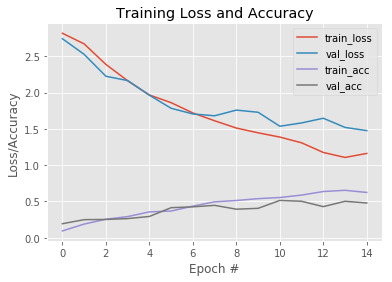

In [9]:
import matplotlib.pyplot as plt

# The above trained sample results is plot.
plt.style.use("ggplot")
plt.figure()
# Train loss is plot
plt.plot(np.arange(0, NUM_EPOCHS), H2.history["loss"], label="train_loss")
# Validation loss is plot
plt.plot(np.arange(0, NUM_EPOCHS), H2.history["val_loss"], label="val_loss")
# Train accuracy is plot
plt.plot(np.arange(0, NUM_EPOCHS), H2.history["acc"], label="train_acc")
# Validation accuracy is plot
plt.plot(np.arange(0, NUM_EPOCHS), H2.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

##3) CNN 6 conv + 3  MaxPool
The below CNN implementation will study a basic CNN baseline with 6 convolutional layers and 3 Max Pooling layers

In [0]:
import tensorflow as tf

# Create class ShallowNet to build CNN model containing layers of convolutional and pooling
class ShallowNet3:
  # function for creating the CNN model
  def build(width, height, depth, classes):
    # Sequential model with 2 conv, 2 Maxpooling and after flattening, the last soft max activation layer
    model = tf.keras.Sequential()
    inputShape = (height, width, depth)
    # 1st convolutional layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same",input_shape=inputShape, activation='relu'))
    # 2nd convolutional layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same",input_shape=inputShape, activation='relu'))
    # 1st Max Pooling layer
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
    # 3rd convolutional layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same",input_shape=inputShape, activation='relu'))
    # 4th convolutional layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same",input_shape=inputShape, activation='relu'))
    # 2nd Max Pooling layer
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
    # 5th convolutional layer
    model.add(tf.keras.layers.Conv2D(128, (3, 3), padding="same",input_shape=inputShape, activation='relu'))
    # 6th convolutional layer
    model.add(tf.keras.layers.Conv2D(128, (3, 3), padding="same",input_shape=inputShape, activation='relu'))
    # 3rd Max Pooling layer
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
    # the output is flattenned ...
    model.add(tf.keras.layers.Flatten())
    # ... before feeding the softmax activation layer
    model.add(tf.keras.layers.Dense(classes, activation='softmax'))
    
    return model

In [11]:
# Nb of epochs
NUM_EPOCHS = 25

# Batch size
batchSize = 51


print("Compiling model...")
# Choice of an optimizer: SGD Optimizer with a learning rate of 0.01 
opt = tf.keras.optimizers.SGD(lr=0.01)

# CNN model is built for iputs image of 128x128x3
model3 = ShallowNet3.build(width=128, height=128, depth=3, classes=17)

print (model3.summary())
# CNN Model is compiled with the above optimizer
model3.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# CNN model is trained with data1.h5 data with the above specified batch size and nb of epochs
print("Training network...")
H3 = model3.fit(trainX, trainY, validation_data=(testX, testY),batch_size=batchSize, epochs=NUM_EPOCHS)

Compiling model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 128)       73

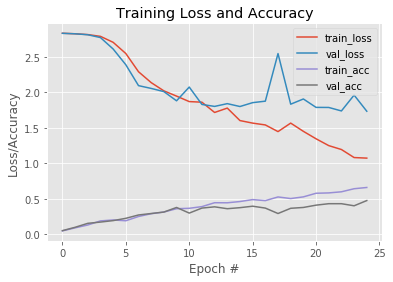

In [12]:
import matplotlib.pyplot as plt

# The above trained sample results is plot.
plt.style.use("ggplot")
plt.figure()
# Train loss is plot
plt.plot(np.arange(0, NUM_EPOCHS), H3.history["loss"], label="train_loss")
# Validation loss is plot
plt.plot(np.arange(0, NUM_EPOCHS), H3.history["val_loss"], label="val_loss")
# Train accuracy is plot
plt.plot(np.arange(0, NUM_EPOCHS), H3.history["acc"], label="train_acc")
# Validation accuracy is plot
plt.plot(np.arange(0, NUM_EPOCHS), H3.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()




\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#
#     PART A Section II       # 
\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#

##1) Data Augmentation on CNN 1 conv + 1 MaxPool


In [0]:
numTrainingSamples= 2000
numValidationSamples= 800
# Nb of epochs
NUM_EPOCHS = 100
# Batch size
batchSize = 51

# construct the image generator for data augmentation with the following parameters:
#       Allowed rotation range : 40 degrees
#       Allowed shift : 1/10 from original image
#       Allowed crop : 0.2
#       Allowed zoom range : 40
#       Allowed horizontal flip : true
trainDataGenerator= tf.keras.preprocessing.image.ImageDataGenerator( 
    rotation_range=40, width_shift_range=0.1, shear_range=0.2, zoom_range=0.4, horizontal_flip=True)

# trainX data will be used for data augmentaation
trainDataGenerator.fit(trainX, augment=True)

# Data is generated on the flow
train_generator= trainDataGenerator.flow(trainX, trainY, batch_size=batchSize)


In [14]:
# Choice of an optimizer: SGD Optimizer with a learning rate of 0.01 
opt = tf.keras.optimizers.SGD(lr=0.01)

# CNN model is built for iputs image of 128x128x3
model = ShallowNet.build(width=128, height=128, depth=3, classes=17)

# CNN Model is compiled with the above optimizer
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Our 1st CNN model is trained with augmented data
H = model.fit_generator(
    train_generator,
    steps_per_epoch= numTrainingSamples,
    epochs=NUM_EPOCHS,  
    validation_data=(testX,testY)
)

Epoch 1/100
20/20 [==============================] - 3s 170ms/step - loss: 2.7498 - acc: 0.1294 - val_loss: 2.4762 - val_acc: 0.1971
Epoch 2/100
20/20 [==============================] - 3s 167ms/step - loss: 2.3847 - acc: 0.2275 - val_loss: 2.1474 - val_acc: 0.2912
Epoch 3/100
20/20 [==============================] - 3s 172ms/step - loss: 2.2078 - acc: 0.2657 - val_loss: 1.9650 - val_acc: 0.3971
Epoch 4/100
20/20 [==============================] - 3s 172ms/step - loss: 2.1003 - acc: 0.3010 - val_loss: 1.8340 - val_acc: 0.4588
Epoch 5/100
20/20 [==============================] - 3s 172ms/step - loss: 1.9938 - acc: 0.3255 - val_loss: 1.7997 - val_acc: 0.4382
Epoch 6/100
20/20 [==============================] - 3s 171ms/step - loss: 1.9327 - acc: 0.3490 - val_loss: 1.7338 - val_acc: 0.4147
Epoch 7/100
20/20 [==============================] - 3s 172ms/step - loss: 1.8387 - acc: 0.3843 - val_loss: 1.6567 - val_acc: 0.4559
Epoch 8/100
20/20 [==============================] - 4s 177ms/step - 

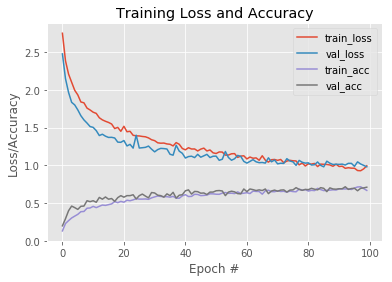

In [15]:
import matplotlib.pyplot as plt
# plot the training loss and accuracy of 1st CNN model
plt.style.use("ggplot")
plt.figure()
# Train loss is plot
plt.plot(np.arange(0, NUM_EPOCHS), H.history["loss"], label="train_loss")
# Validation loss is plot
plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_loss"], label="val_loss")
# Train accuracy is plot
plt.plot(np.arange(0, NUM_EPOCHS), H.history["acc"], label="train_acc")
# Validation accuracy is plot
plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

##2) Data Augmentation on CNN 2 conv + 2 MaxPool

In [16]:
# Choice of an optimizer: SGD Optimizer with a learning rate of 0.01 
opt = tf.keras.optimizers.SGD(lr=0.01)

# CNN model is built for iputs image of 128x128x3
model2 = ShallowNet2.build(width=128, height=128, depth=3, classes=17)

# CNN Model is compiled with the above optimizer
model2.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Our 2nd CNN model is trained with augmented data
H2 = model2.fit_generator(
    train_generator,
    steps_per_epoch= numTrainingSamples,
    epochs=NUM_EPOCHS,  
    validation_data=(testX,testY)
)

Epoch 1/100
20/20 [==============================] - 4s 194ms/step - loss: 2.8139 - acc: 0.0902 - val_loss: 2.7606 - val_acc: 0.1235
Epoch 2/100
20/20 [==============================] - 4s 195ms/step - loss: 2.7060 - acc: 0.1765 - val_loss: 2.5928 - val_acc: 0.2118
Epoch 3/100
20/20 [==============================] - 4s 195ms/step - loss: 2.5233 - acc: 0.2088 - val_loss: 2.3960 - val_acc: 0.2294
Epoch 4/100
20/20 [==============================] - 3s 170ms/step - loss: 2.3441 - acc: 0.2196 - val_loss: 2.1919 - val_acc: 0.2324
Epoch 5/100
20/20 [==============================] - 3s 175ms/step - loss: 2.2082 - acc: 0.2667 - val_loss: 2.0796 - val_acc: 0.3235
Epoch 6/100
20/20 [==============================] - 4s 178ms/step - loss: 2.1577 - acc: 0.2882 - val_loss: 1.9807 - val_acc: 0.3265
Epoch 7/100
20/20 [==============================] - 3s 170ms/step - loss: 2.0650 - acc: 0.3020 - val_loss: 1.9167 - val_acc: 0.3235
Epoch 8/100
20/20 [==============================] - 4s 183ms/step - 

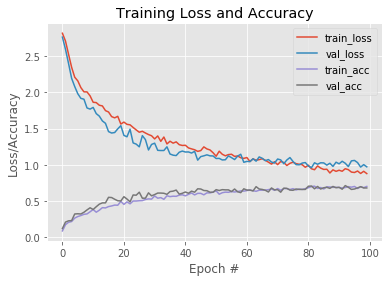

In [17]:
import matplotlib.pyplot as plt
# plot the training loss and accuracy of 2nd CNN model
plt.style.use("ggplot")
plt.figure()
# Train loss is plot
plt.plot(np.arange(0, NUM_EPOCHS), H2.history["loss"], label="train_loss")
# Validation loss is plot
plt.plot(np.arange(0, NUM_EPOCHS), H2.history["val_loss"], label="val_loss")
# Train accuracy is plot
plt.plot(np.arange(0, NUM_EPOCHS), H2.history["acc"], label="train_acc")
# Validation accuracy is plot
plt.plot(np.arange(0, NUM_EPOCHS), H2.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

##3) Data Augmentation on CNN 6 conv + 3 MaxPool

In [18]:
# Choice of an optimizer: SGD Optimizer with a learning rate of 0.01 
opt = tf.keras.optimizers.SGD(lr=0.01)

# CNN model is built for iputs image of 128x128x3
model3 = ShallowNet3.build(width=128, height=128, depth=3, classes=17)

# CNN Model is compiled with the above optimizer
model3.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Our 3rd CNN model is trained with augmented data
H3 = model3.fit_generator(
    train_generator,
    steps_per_epoch= numTrainingSamples,
    epochs=NUM_EPOCHS,  
    validation_data=(testX,testY)
)

Epoch 1/100
20/20 [==============================] - 4s 187ms/step - loss: 2.8322 - acc: 0.0598 - val_loss: 2.8259 - val_acc: 0.0618
Epoch 2/100
20/20 [==============================] - 4s 180ms/step - loss: 2.8235 - acc: 0.0686 - val_loss: 2.8166 - val_acc: 0.0706
Epoch 3/100
20/20 [==============================] - 4s 183ms/step - loss: 2.8079 - acc: 0.0931 - val_loss: 2.7952 - val_acc: 0.1059
Epoch 4/100
20/20 [==============================] - 4s 182ms/step - loss: 2.7704 - acc: 0.1235 - val_loss: 2.7314 - val_acc: 0.1618
Epoch 5/100
20/20 [==============================] - 4s 181ms/step - loss: 2.6676 - acc: 0.1441 - val_loss: 2.5223 - val_acc: 0.2412
Epoch 6/100
20/20 [==============================] - 4s 183ms/step - loss: 2.5111 - acc: 0.1637 - val_loss: 2.3422 - val_acc: 0.1882
Epoch 7/100
20/20 [==============================] - 4s 183ms/step - loss: 2.4096 - acc: 0.2049 - val_loss: 2.1671 - val_acc: 0.2647
Epoch 8/100
20/20 [==============================] - 4s 180ms/step - 

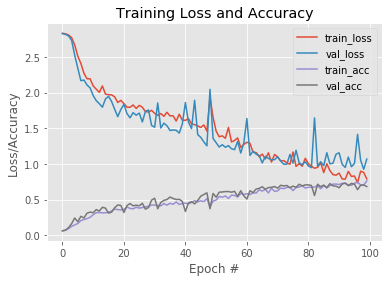

In [19]:
import matplotlib.pyplot as plt
# plot the training loss and accuracy of 3rd CNN model
plt.style.use("ggplot")
plt.figure()
# Train loss is plot
plt.plot(np.arange(0, NUM_EPOCHS), H3.history["loss"], label="train_loss")
# Validation loss is plot
plt.plot(np.arange(0, NUM_EPOCHS), H3.history["val_loss"], label="val_loss")
# Train accuracy is plot
plt.plot(np.arange(0, NUM_EPOCHS), H3.history["acc"], label="train_acc")
# Validation accuracy is plot
plt.plot(np.arange(0, NUM_EPOCHS), H3.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

##4) Data Augmentation without horizontal flip on CNN 2 conv + 2 **MaxPool**

In [0]:
numTrainingSamples= 2000
numValidationSamples= 800
# Nb of epochs
NUM_EPOCHS = 100
# Batch size
batchSize = 51

# construct the image generator for data augmentation with the following parameters:
#       Allowed rotation range : 40 degrees
#       Allowed shift : 1/10 from original image
#       Allowed crop : 0.2
#       Allowed zoom range : 40
# No horizontal flip parameter is used here
trainDataGenerator= tf.keras.preprocessing.image.ImageDataGenerator( 
    rotation_range=40, width_shift_range=0.1, shear_range=0.2, zoom_range=0.4)

# trainX data will be used for data augmentaation
trainDataGenerator.fit(trainX, augment=True)

# Data is generated on the flow
train_generator= trainDataGenerator.flow(trainX, trainY, batch_size=batchSize)


In [21]:
# Choice of an optimizer: SGD Optimizer with a learning rate of 0.01 
opt = tf.keras.optimizers.SGD(lr=0.01)

# CNN model is built for iputs image of 128x128x3
model2 = ShallowNet2.build(width=128, height=128, depth=3, classes=17)

# CNN Model is compiled with the above optimizer
model2.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Our 2nd CNN model is trained with augmented data
H2 = model2.fit_generator(
    train_generator,
    steps_per_epoch= numTrainingSamples,
    epochs=NUM_EPOCHS,  
    validation_data=(testX,testY)
)

Epoch 1/100
20/20 [==============================] - 3s 174ms/step - loss: 2.8132 - acc: 0.0882 - val_loss: 2.7410 - val_acc: 0.2353
Epoch 2/100
20/20 [==============================] - 3s 171ms/step - loss: 2.6813 - acc: 0.1686 - val_loss: 2.5359 - val_acc: 0.2559
Epoch 3/100
20/20 [==============================] - 3s 174ms/step - loss: 2.4902 - acc: 0.2059 - val_loss: 2.3185 - val_acc: 0.2353
Epoch 4/100
20/20 [==============================] - 3s 173ms/step - loss: 2.3080 - acc: 0.2314 - val_loss: 2.1196 - val_acc: 0.3029
Epoch 5/100
20/20 [==============================] - 3s 173ms/step - loss: 2.1817 - acc: 0.2716 - val_loss: 1.9601 - val_acc: 0.4088
Epoch 6/100
20/20 [==============================] - 3s 170ms/step - loss: 2.0803 - acc: 0.2902 - val_loss: 1.8867 - val_acc: 0.3853
Epoch 7/100
20/20 [==============================] - 4s 176ms/step - loss: 2.0278 - acc: 0.3196 - val_loss: 1.8482 - val_acc: 0.3500
Epoch 8/100
20/20 [==============================] - 3s 172ms/step - 

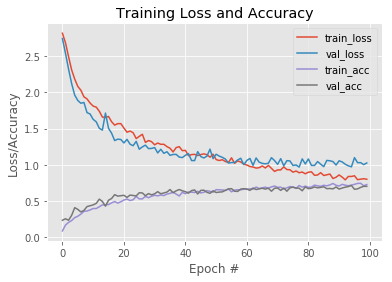

In [22]:
import matplotlib.pyplot as plt
# plot the training loss and accuracy of 2nd model
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, NUM_EPOCHS), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, NUM_EPOCHS), H2.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, NUM_EPOCHS), H2.history["acc"], label="train_acc")
plt.plot(np.arange(0, NUM_EPOCHS), H2.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

##5) Data Augmentation without crop on CNN 2 conv + 2 **MaxPool**

In [0]:
numTrainingSamples= 2000
numValidationSamples= 800
# Nb of epochs
NUM_EPOCHS = 100
# Batch size
batchSize = 51

# construct the image generator for data augmentation with the following parameters:
#       Allowed rotation range : 40 degrees
#       Allowed shift : 1/10 from original image
#       Allowed zoom range : 40
#       Allowed horizontal flip : true
# No crop/shear parameter is used here
trainDataGenerator= tf.keras.preprocessing.image.ImageDataGenerator( 
    rotation_range=40, width_shift_range=0.1, zoom_range=0.4, horizontal_flip=True)

# trainX data will be used for data augmentaation
trainDataGenerator.fit(trainX, augment=True)

# Data is generated on the flow
train_generator= trainDataGenerator.flow(trainX, trainY, batch_size=batchSize)


In [24]:
# Choice of an optimizer: SGD Optimizer with a learning rate of 0.01 
opt = tf.keras.optimizers.SGD(lr=0.01)

# CNN model is built for iputs image of 128x128x3
model2 = ShallowNet2.build(width=128, height=128, depth=3, classes=17)

# CNN Model is compiled with the above optimizer
model2.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Our 2nd CNN model is trained with augmented data
H2 = model2.fit_generator(
    train_generator,
    steps_per_epoch= numTrainingSamples,
    epochs=NUM_EPOCHS,  
    validation_data=(testX,testY)
)

Epoch 1/100
20/20 [==============================] - 3s 172ms/step - loss: 2.7886 - acc: 0.0922 - val_loss: 2.6958 - val_acc: 0.1676
Epoch 2/100
20/20 [==============================] - 3s 171ms/step - loss: 2.5947 - acc: 0.1902 - val_loss: 2.4400 - val_acc: 0.2029
Epoch 3/100
20/20 [==============================] - 3s 166ms/step - loss: 2.3893 - acc: 0.2206 - val_loss: 2.2404 - val_acc: 0.2147
Epoch 4/100
20/20 [==============================] - 3s 171ms/step - loss: 2.2487 - acc: 0.2539 - val_loss: 2.0653 - val_acc: 0.3294
Epoch 5/100
20/20 [==============================] - 3s 174ms/step - loss: 2.1589 - acc: 0.2716 - val_loss: 1.9725 - val_acc: 0.3794
Epoch 6/100
20/20 [==============================] - 4s 179ms/step - loss: 2.0981 - acc: 0.2912 - val_loss: 2.0276 - val_acc: 0.3324
Epoch 7/100
20/20 [==============================] - 3s 173ms/step - loss: 2.0316 - acc: 0.3137 - val_loss: 1.9087 - val_acc: 0.3500
Epoch 8/100
20/20 [==============================] - 3s 173ms/step - 

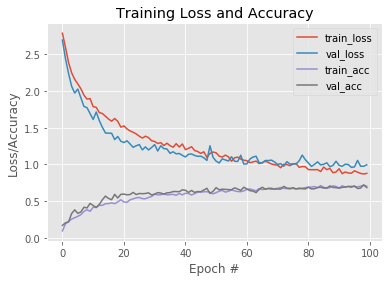

In [25]:
import matplotlib.pyplot as plt
# plot the training loss and accuracy of 2nd model
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, NUM_EPOCHS), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, NUM_EPOCHS), H2.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, NUM_EPOCHS), H2.history["acc"], label="train_acc")
plt.plot(np.arange(0, NUM_EPOCHS), H2.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()





\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#
#     PART A Section III       # 
\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#
  

In [0]:
# Create class nin_cnn_model to build CNN model containing layers of convolutional and pooling
class nin_cnn_model:
  #function for creating the CNN model
  def build(width, height, depth, classes):
    # Sequential model with 2 conv, 2 dropout, 1 Maxpooling and after flattening, the last soft max activation layer
    model = tf.keras.Sequential()
    inputShape = (height, width, depth)
    # 1st convolutional Layer
    model.add(tf.keras.layers.Conv2D(32, (8, 8), padding="valid",input_shape=inputShape, activation='relu'))
    # Max pooling Layer
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    # 1st Dropout layer
    model.add(tf.keras.layers.Dropout(0.5))
    # 2nd convolutional Layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="valid", activation='relu'))
    # 2nd Dropout layer
    model.add(tf.keras.layers.Dropout(0.5))
    # the output is flattenned ...
    model.add(tf.keras.layers.Flatten())
    # ... before feeding the softmax activation layer 
    model.add(tf.keras.layers.Dense(classes, activation='softmax'))

    return model


In [0]:

# Nb of epochs
NUM_EPOCHS = 10
# Batch size
batchSize = 51

# Create class Train_model to train the CNN model
class Train_model:
  def train(modeltrain, X_train, Y_train, X_test, Y_test, nb_epochs, bs):
    print("Compiling model...")
    # Choice of an optimizer: SGD Optimizer with a learning rate of 0.01
    opt = tf.keras.optimizers.SGD(lr=0.01)
    # CNN model is built for iputs image of 128x128x3
    model = modeltrain.build(width=128, height=128, depth=3, classes=17)

    print (model.summary())
    # CNN Model is compiled with the above optimizer
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    # CNN model is trained with data1.h5 data with the above specified batch size and nb of epochs
    print("Training network...")
    H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),batch_size=batchSize, epochs=NUM_EPOCHS)
    
    # we return the model, its history and nb of epoch
    return model, H, nb_epochs

In [28]:
### In this section we are trying to train 10 identical models to build later on an ensemble

import random

# List of models which will be trained
trained_models = []

# List of validation accuracy for each trained model
trained_acc = []

# A loop is created to train 10 models
for model in list(range(10)):
  # the model is trained through the Train_model class, train function
  # the functions output 3 objects: the model, its history and the nb of epoch
  conv_pool_model, conv_pool_history, conv_pool_epochs = Train_model.train(nin_cnn_model, trainX, trainY, testX, testY, NUM_EPOCHS, batchSize)
  # the model is appended to the trained list
  trained_models.append(conv_pool_model)
  # the validation accuracy of the trained model is also appended to the trained_acc list
  trained_acc.append(conv_pool_history.history["val_acc"][-1])
  

Compiling model...
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 121, 121, 32)      6176      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 58, 58, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 58, 58, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 215296)            0         
________

In [29]:
### In this section we are building an ensemble of the trained models

# nb of trained models
nb_models = len(trained_models)

#initilization of the prediction sum
sum_pred = [0]

# Loop iterating through each model
for mod in trained_models:
  # Make a prediction on testX data through each trained model
  prediction = mod.predict(testX)
  # sum those arrays of predictions
  sum_pred = np.add(sum_pred,prediction)

# Compute the average predictions
average_pred = np.divide(sum_pred,float(nb_models))

# select the class with the highest value
predictions = np.argmax(average_pred, axis=1)
# Check if the model prediction is correct (True if prediction correct, False otherwise)
correct = np.equal(predictions, testY)
# Conversion of the boolean array into a numerical array (1 if True, 0 if False)
pred_correct = correct.astype(np.float32)
# mean value of predictions_correct
accuracy = np.mean(pred_correct)

# Display each accuracy of the trained model
for acc in list(range(len(trained_acc))):
  print("Accuracy of trained model ",acc, ":", trained_acc[acc])
print()

# print the overall accuracy of the ensemble of trained models
print("Accuracy of the ensemble:",accuracy)



Accuracy of trained model  0 : 0.5529412
Accuracy of trained model  1 : 0.5205882
Accuracy of trained model  2 : 0.55588233
Accuracy of trained model  3 : 0.5352941
Accuracy of trained model  4 : 0.3735294
Accuracy of trained model  5 : 0.5235294
Accuracy of trained model  6 : 0.44117647
Accuracy of trained model  7 : 0.4735294
Accuracy of trained model  8 : 0.5294118
Accuracy of trained model  9 : 0.4735294

Accuracy of the ensemble: 0.5735294


In [0]:
# Create class nin_cnn_model2 to build CNN model containing layers of convolutional and pooling
class nin_cnn_model2:
  #function for creating the CNN model
  def build(width, height, depth, classes, initialization = "RandomNormal" ):
    # Choose an initialization
    if initialization == "RandomNormal":
      init=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
    elif initialization == "RandomUniform":
      init=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)
    elif initialization == "glorot_uniform":
      init=tf.keras.initializers.glorot_uniform(seed=None)
    elif initialization == "lecun_normal":
      init=tf.keras.initializers.lecun_normal(seed=None)
      
    # Sequential model with 2 conv, 2 dropout, 1 Maxpooling and after flattening, the last soft max activation layer
    model = tf.keras.Sequential()
    inputShape = (height, width, depth)
    # 1st convolutional Layer
    model.add(tf.keras.layers.Conv2D(32, (8, 8), padding="valid",input_shape=inputShape, activation='relu', kernel_initializer=init, bias_initializer=init))
    # Max pooling Layer
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    # 1st Dropout layer
    model.add(tf.keras.layers.Dropout(0.5))
    # 2nd convolutional Layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="valid", activation='relu', kernel_initializer=init, bias_initializer=init))
    # 2nd Dropout layer
    model.add(tf.keras.layers.Dropout(0.5))
    # the output is flattenned ...
    model.add(tf.keras.layers.Flatten())
    # ... before feeding the softmax activation layer
    model.add(tf.keras.layers.Dense(classes, activation='softmax'))

    return model


In [0]:

import random
# Nb of epochs
NUM_EPOCHS = 10
# Batch size
batchSize = 51

# Create class Train_model to train the CNN model
class Train_model:
  def train(modeltrain, X_train, Y_train, X_test, Y_test, nb_epochs, bs, algo_opti="SGD"):
    print("Compiling model...")
    # Selection of an optimizer
    if algo_opti == "RMSprop":
      opt = tf.keras.optimizers.RMSprop(lr=0.001)
    elif algo_opti == "Nadam":
      opt = tf.keras.optimizers.Nadam(lr=0.001)
    elif algo_opti == "Adam":
      opt = tf.keras.optimizers.Adam(lr=0.001)
    elif algo_opti == "Adagrad":
      opt = tf.keras.optimizers.Adagrad(lr=0.001)
    else:
      opt = tf.keras.optimizers.SGD(lr=0.01)
    
    # list of available initializations
    algo_init = ["RandomNormal", "RandomUniform", "glorot_uniform", "lecun_normal"]
    # the selection of an initialization is random
    initializer = random.choice(algo_init)
    # CNN model is built for iputs image of 128x128x3
    model = modeltrain.build(width=128, height=128, depth=3, classes=17, initialization = initializer)

    print (model.summary())
    # CNN Model is compiled with a selected optimizer
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    # CNN model is trained with data1.h5 data with the above specified batch size and nb of epochs
    print("Training network...")
    H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),batch_size=batchSize, epochs=NUM_EPOCHS)
    
    # we return the model, its history and nb of epoch
    return model, H, nb_epochs

In [32]:
### In this section we are trying to train 10 identical models to build later on an ensemble

import random

# List of models which will be trained
trained_models = []

# List of validation accuracy for each trained model
trained_acc = []

# list of available optimizers
algo_optimizers = ["SGD", "Adam", "Nadam", "RMSprop", "Adagrad"]

# A loop is created to train 10 models
for model in list(range(10)):
  # the choice of the optimizer is random
  opti = random.choice(algo_optimizers)
  print("Selection of optimizer :", opti)
  
  # the model is trained through the Train_model class, train function
  # the functions output 3 objects: the model, its history and the nb of epoch
  conv_pool_model, conv_pool_history, conv_pool_epochs = Train_model.train(nin_cnn_model2, trainX, trainY, testX, testY, NUM_EPOCHS, batchSize, opti)
  # the model is appended to the trained list
  trained_models.append(conv_pool_model)
  # the validation accuracy of the trained model is also appended to the trained_acc list
  trained_acc.append(conv_pool_history.history["val_acc"][-1])
 


Selection of optimizer : Nadam
Compiling model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 121, 121, 32)      6176      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 58, 58, 64)        18496     
_________________________________________________________________
dropout_21 (Dropout)         (None, 58, 58, 64)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 215296)            0         
_________________________________________________________________
dense_18 (Dense)          

In [33]:
### In this section we are building an ensemble of the trained models

# nb of trained models
nb_models = len(trained_models)

#initilization of the prediction sum
sum_pred = [0]

# Loop iterating through each model
for mod in trained_models:
  # Make a prediction on testX data through each trained model
  prediction = mod.predict(testX)
  # sum those arrays of predictions
  sum_pred = np.add(sum_pred,prediction)

# Compute the average predictions
average_pred = np.divide(sum_pred,float(nb_models))

# select the class with the highest value
predictions = np.argmax(average_pred, axis=1)
# Check if the model prediction is correct (True if prediction correct, False otherwise)
correct = np.equal(predictions, testY)
# Conversion of the boolean array into a numerical array (1 if True, 0 if False)
pred_correct = correct.astype(np.float32)
# mean value of predictions_correct
accuracy = np.mean(pred_correct)

# Display each accuracy of the trained model
for acc in list(range(len(trained_acc))):
  print("Accuracy of trained model ",acc, ":", trained_acc[acc])
print()

# print the overall accuracy of the ensemble of trained models
print("Accuracy of the ensemble:",accuracy)



Accuracy of trained model  0 : 0.62647057
Accuracy of trained model  1 : 0.58235294
Accuracy of trained model  2 : 0.49411765
Accuracy of trained model  3 : 0.44705883
Accuracy of trained model  4 : 0.46764705
Accuracy of trained model  5 : 0.46470588
Accuracy of trained model  6 : 0.4764706
Accuracy of trained model  7 : 0.48235294
Accuracy of trained model  8 : 0.5735294
Accuracy of trained model  9 : 0.56764704

Accuracy of the ensemble: 0.63529414
